## The data analysis pipeline

1. Clean data
   - Handling missingness
   - Handlin outliers
   - Duplicates
   - Addressingdata type mismatches
2. Univariate analysis
3. Bivaraiate analysis- identify relationships
4. Multivariate analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv(r"C:\Users\USER\desktop\PY_DATA\train.csv")

In [3]:
train.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,0,19/12/2022,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465336432905 kg
1,1,21/11/2023,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt,51.54905281454645 kg
2,4,01/02/2022,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt,53.008322732556536 kg
3,5,19/03/2023,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt,48.62152711280995 kg
4,6,18/07/2022,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT,44.15698435866615 kg


In [4]:
train.size

10932

In [7]:
train.shape[0]

911

In [8]:
train.shape[1]

12

In [9]:
train.columns

Index(['ID', 'date', 'meals_served', 'kitchen_staff', 'temperature_C',
       'humidity_percent', 'day_of_week', 'special_event', 'past_waste_kg',
       'staff_experience', 'waste_category', 'food_waste_kg'],
      dtype='object')

In [11]:
train.dtypes

ID                    int64
date                 object
meals_served          int64
kitchen_staff         int64
temperature_C       float64
humidity_percent    float64
day_of_week           int64
special_event         int64
past_waste_kg       float64
staff_experience     object
waste_category       object
food_waste_kg        object
dtype: object

In [12]:
train['date']=pd.to_datetime(train['date'],format= 'mixed')
train['date'].dtype

dtype('<M8[ns]')

In [14]:
train['day'] = train['date'].dt.dayofweek
train.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg,day
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465336432905 kg,0
1,1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt,51.54905281454645 kg,1
2,4,2022-01-02,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt,53.008322732556536 kg,6
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt,48.62152711280995 kg,6
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT,44.15698435866615 kg,0


In [ ]:
# drop day_of_week
train.drop('day_of_week',axis=1, inplace=True)
train.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg,day
0,0,2022-12-19,196,13,27.887273,45.362854,0,7.740587,intermediate,dairy,28.946465336432905 kg,0
1,1,2023-11-21,244,15,10.317872,64.430475,0,42.311779,NaN,MeAt,51.54905281454645 kg,1
2,4,2022-01-02,148,16,27.714300,69.046113,0,41.184305,Beginner,MeAt,53.008322732556536 kg,6
3,5,2023-03-19,157,19,19.173902,46.292823,0,41.543492,Beginner,MeAt,48.62152711280995 kg,6
4,6,2022-07-18,297,10,26.375233,79.741064,0,26.525097,Intermediate,MEAT,44.15698435866615 kg,0


In [17]:
# convert food waste to numerical value
train['food_waste_kg'] = train['food_waste_kg'].str.replace('kg', '').astype(float)

In [ ]:
train['food_waste_kg'] = train['food_waste_kg'].astype(str).replace('kg', '').astype(float)

In [18]:
train.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg,day
0,0,2022-12-19,196,13,27.887273,45.362854,0,7.740587,intermediate,dairy,28.946465,0
1,1,2023-11-21,244,15,10.317872,64.430475,0,42.311779,NaN,MeAt,51.549053,1
2,4,2022-01-02,148,16,27.714300,69.046113,0,41.184305,Beginner,MeAt,53.008323,6
3,5,2023-03-19,157,19,19.173902,46.292823,0,41.543492,Beginner,MeAt,48.621527,6
4,6,2022-07-18,297,10,26.375233,79.741064,0,26.525097,Intermediate,MEAT,44.156984,0


In [20]:
train['staff_experience'] = train['staff_experience'].str.lower()
train['waste_category'] = train['waste_category'].str.lower()
train.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg,day
0,0,2022-12-19,196,13,27.887273,45.362854,0,7.740587,intermediate,dairy,28.946465,0
1,1,2023-11-21,244,15,10.317872,64.430475,0,42.311779,NaN,meat,51.549053,1
2,4,2022-01-02,148,16,27.714300,69.046113,0,41.184305,beginner,meat,53.008323,6
3,5,2023-03-19,157,19,19.173902,46.292823,0,41.543492,beginner,meat,48.621527,6
4,6,2022-07-18,297,10,26.375233,79.741064,0,26.525097,intermediate,meat,44.156984,0


In [21]:
train.dtypes

ID                           int64
date                datetime64[ns]
meals_served                 int64
kitchen_staff                int64
temperature_C              float64
humidity_percent           float64
special_event                int64
past_waste_kg              float64
staff_experience            object
waste_category              object
food_waste_kg              float64
day                          int32
dtype: object

## Missingness
types of missingness
1. MCAR- mising completely at Random
2. MAR- missing at random
3. Missing not at random

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                911 non-null    int64         
 1   date              911 non-null    datetime64[ns]
 2   meals_served      911 non-null    int64         
 3   kitchen_staff     911 non-null    int64         
 4   temperature_C     911 non-null    float64       
 5   humidity_percent  911 non-null    float64       
 6   special_event     911 non-null    int64         
 7   past_waste_kg     911 non-null    float64       
 8   staff_experience  747 non-null    object        
 9   waste_category    911 non-null    object        
 10  food_waste_kg     911 non-null    float64       
 11  day               911 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(4), object(2)
memory usage: 82.0+ KB


In [23]:
import missingno as mn

<Axes: >

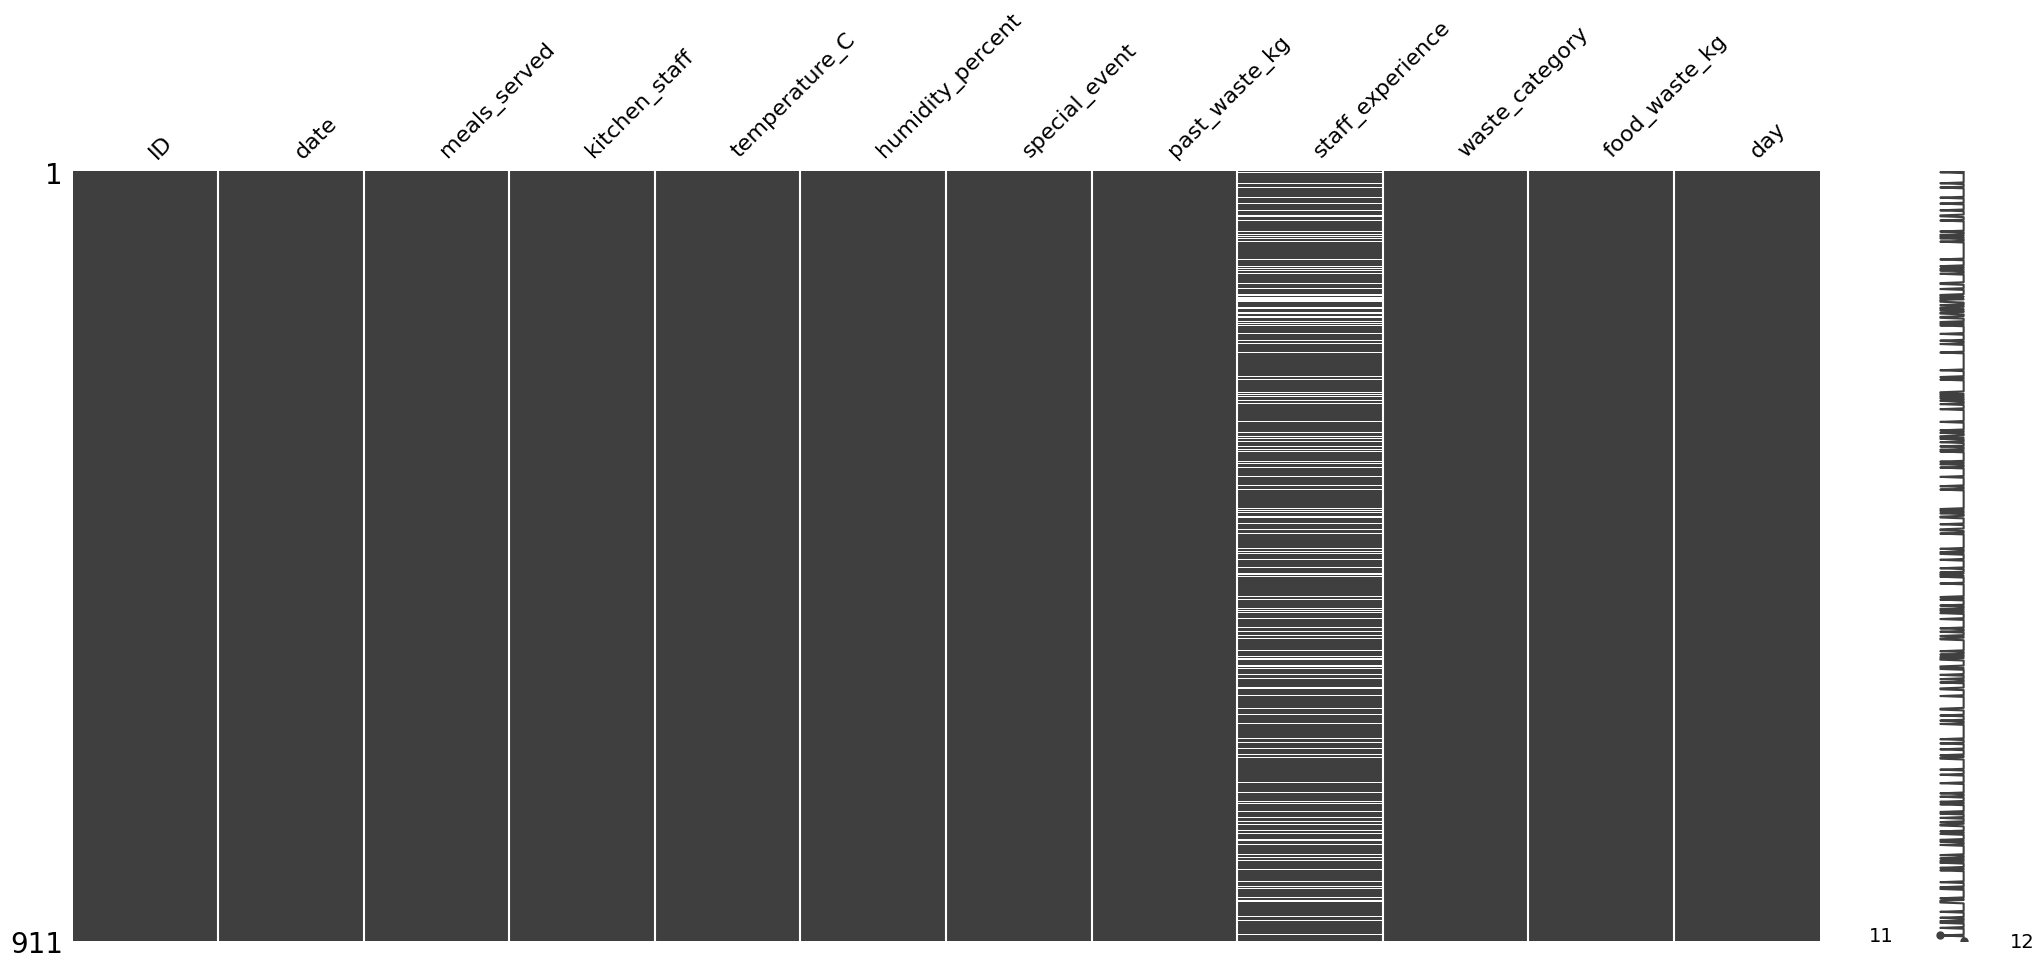

In [24]:
mn.matrix(train)

In [26]:
train.isnull()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg,day
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
906,False,False,False,False,False,False,False,False,False,False,False,False
907,False,False,False,False,False,False,False,False,False,False,False,False
908,False,False,False,False,False,False,False,False,False,False,False,False
909,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
train.isnull().sum()

ID                    0
date                  0
meals_served          0
kitchen_staff         0
temperature_C         0
humidity_percent      0
special_event         0
past_waste_kg         0
staff_experience    164
waste_category        0
food_waste_kg         0
day                   0
dtype: int64

In [30]:
# quantify missingness
total_values=train.count()
total_missing=train.isnull().sum()
percent_missing=total_missing/total_values
percent_missing*100

ID                   0.000000
date                 0.000000
meals_served         0.000000
kitchen_staff        0.000000
temperature_C        0.000000
humidity_percent     0.000000
special_event        0.000000
past_waste_kg        0.000000
staff_experience    21.954485
waste_category       0.000000
food_waste_kg        0.000000
day                  0.000000
dtype: float64

In [31]:
null_mask = train.isnull().any(axis=1)
df_nulls = train[null_mask]

In [33]:
df_nulls.head(20)

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg,day
1,1,2023-11-21,244,15,10.317872,64.430475,0,42.311779,NaN,meat,51.549053,1
14,17,2023-04-29,378,12,12.323229,68.060384,0,41.146021,NaN,meat,51.058018,5
19,22,2024-09-09,253,17,12.768711,42.373044,0,6.584683,NaN,dairy,18.665798,0
31,34,2022-12-04,114,8,24.756598,38.251426,0,25.343897,NaN,meat,23.016292,6
38,41,2024-01-01,272,11,16.947552,32.858475,0,30.910364,NaN,meat,39.502640,0
46,49,2024-07-07,487,6,24.004556,56.945085,0,25.590890,NaN,grains,44.274850,6
52,55,2023-09-09,385,15,33.570779,57.515877,0,8.089190,NaN,meat,31.256636,5
53,56,2022-02-19,373,10,21.713485,88.366579,0,34.335539,NaN,dairy,53.953181,5
58,62,2023-05-13,188,19,22.743106,54.947850,0,35.449009,NaN,vegetables,42.653946,5
71,78,2022-01-20,357,13,10.481220,81.983191,0,26.440757,NaN,vegetables,45.211063,3


In [37]:
train['staff_experience'].fillna(train['staff_experience'].mode()[0],inplace=True)

# train['food_waste_kg'].fillna(train['food_waste_kg'].mean(),inplace=True)
train.isnull().sum()

ID                  0
date                0
meals_served        0
kitchen_staff       0
temperature_C       0
humidity_percent    0
special_event       0
past_waste_kg       0
staff_experience    0
waste_category      0
food_waste_kg       0
day                 0
dtype: int64

## Identifyin and handling outliers

In [38]:
numeric_cols = train.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['ID',
 'meals_served',
 'kitchen_staff',
 'temperature_C',
 'humidity_percent',
 'special_event',
 'past_waste_kg',
 'food_waste_kg',
 'day']

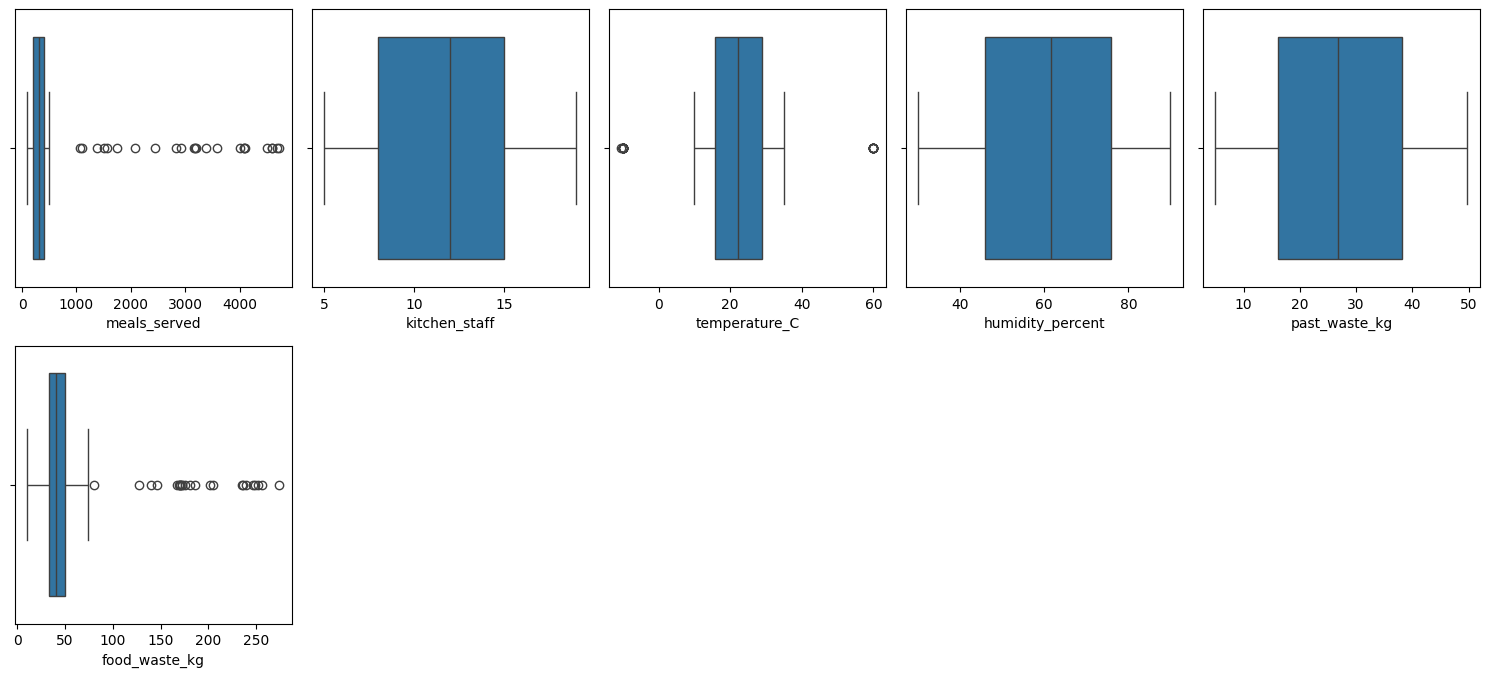

In [40]:
cols=['meals_served','kitchen_staff','temperature_C','humidity_percent','past_waste_kg','food_waste_kg']
num_df=train[cols]

fig = plt.figure(figsize=(15,30))
for i in range(len(cols)):
 ax= fig.add_subplot(9, 5, i+1)
 sns.boxplot(x=num_df.iloc[:, i],ax=ax)
plt.tight_layout()
plt.show()

<Axes: xlabel='temperature_C'>

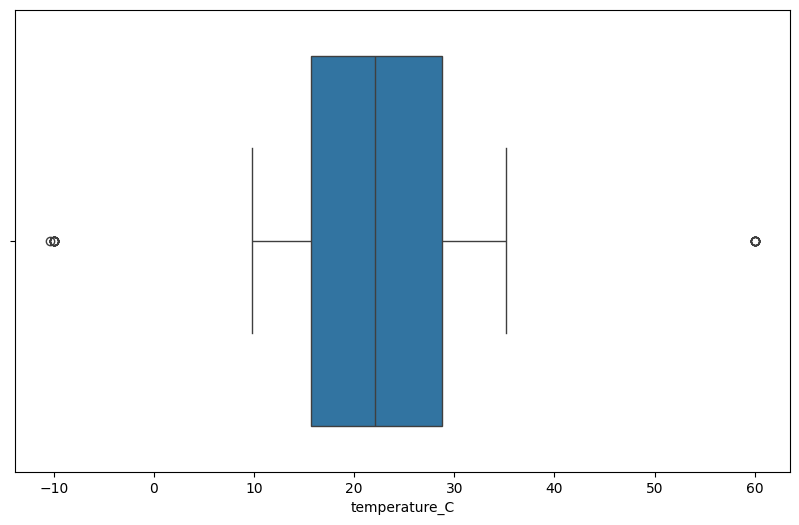

In [43]:
plt.figure(figsize=(10,6))

sns.boxplot(x='temperature_C',data=num_df)

In [46]:
# removing outliers-identify
Q3=np.quantile(train['temperature_C'],0.75)
Q1=np.quantile(train['temperature_C'],0.25)

IQR=Q3-Q1

lower_range=Q1-(1.5*IQR)
upper_rannge=Q3+ (1.5*IQR)



In [47]:
clean_df=train[(train['temperature_C']>= lower_range) & (train['temperature_C']<=upper_rannge)]
clean_df.shape

(889, 12)

## Assignment


In [49]:
clean_df

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg,day
0,0,2022-12-19,196,13,27.887273,45.362854,0,7.740587,intermediate,dairy,28.946465,0
1,1,2023-11-21,244,15,10.317872,64.430475,0,42.311779,intermediate,meat,51.549053,1
2,4,2022-01-02,148,16,27.714300,69.046113,0,41.184305,beginner,meat,53.008323,6
3,5,2023-03-19,157,19,19.173902,46.292823,0,41.543492,beginner,meat,48.621527,6
4,6,2022-07-18,297,10,26.375233,79.741064,0,26.525097,intermediate,meat,44.156984,0
...,...,...,...,...,...,...,...,...,...,...,...,...
906,1044,2022-03-29,395,18,17.354199,45.138435,0,40.550668,intermediate,grains,50.369152,1
907,1045,2022-11-27,483,11,24.912137,59.485091,0,36.470276,intermediate,dairy,43.070121,6
908,1046,2023-12-04,243,11,28.870945,70.508404,0,19.767203,intermediate,meat,29.632560,0
909,1048,2022-02-14,406,10,19.061638,55.286642,0,28.560361,expert,meat,44.615759,0


## LINE PLOT

In [50]:
import seaborn as sns

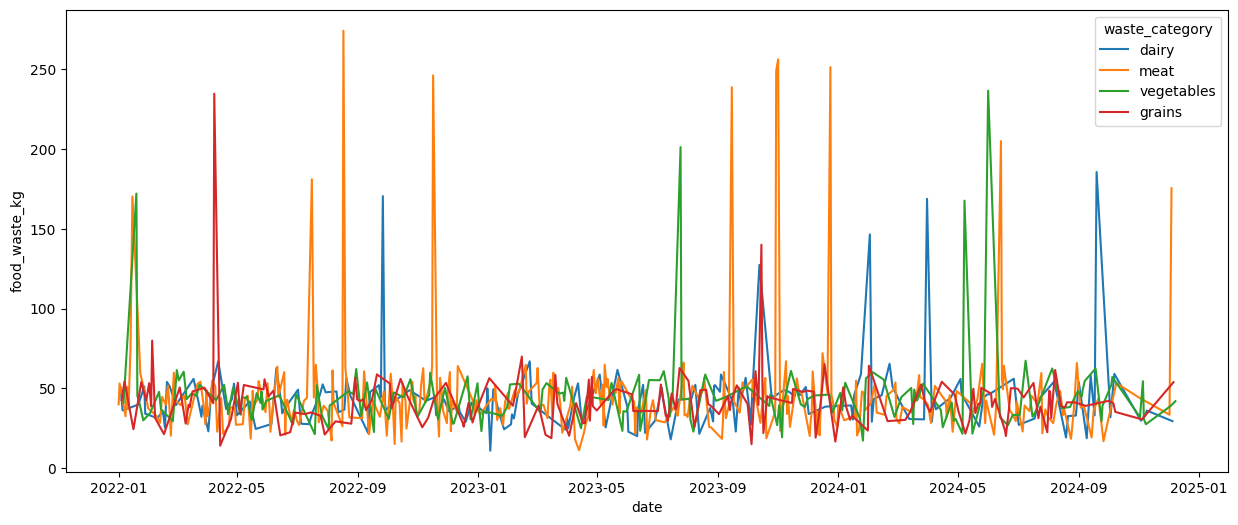

In [52]:
plt.figure(figsize=(15,6))

sns.lineplot(x='date', y='food_waste_kg',data=clean_df, hue='waste_category')

plt.show()

In [55]:
per_quarter_df = clean_df.set_index('date').resample('Q').mean(numeric_only=True).reset_index()
per_quarter_df.head(2)

C:\Users\USER\AppData\Local\Temp\ipykernel_7236\4246539239.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  per_quarter_df = clean_df.set_index('date').resample('Q').mean(numeric_only=True).reset_index()


,date,ID,meals_served,kitchen_staff,temperature_C,humidity_percent,special_event,past_waste_kg,food_waste_kg,day
0,2022-03-31,495.333333,471.038095,11.971429,21.909688,62.254422,0.085714,28.473953,47.940149,3.076190
1,2022-06-30,513.953488,306.674419,11.197674,23.088494,61.453604,0.069767,25.867882,42.013884,3.104651


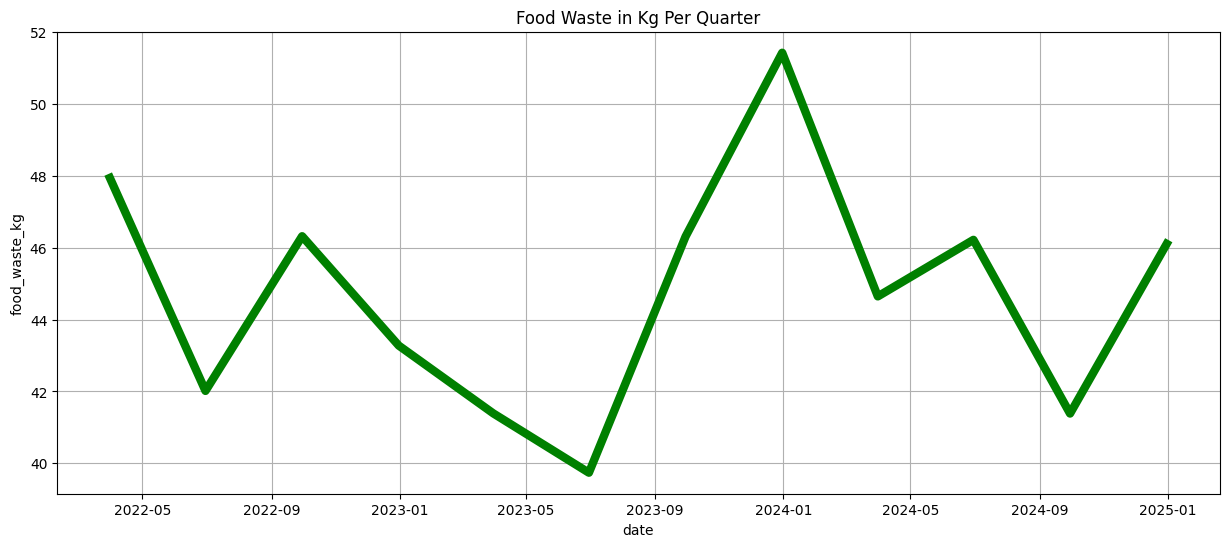

In [61]:
import matplotlib.dates as mdates
plt.figure(figsize=(15,6))

sns.lineplot(x='date', y='food_waste_kg',data=per_quarter_df,color='g',markers='o', linewidth=6)
plt.title('Food Waste in Kg Per Quarter')
plt.grid(True)

plt.show()

## SCATTER PLOTS

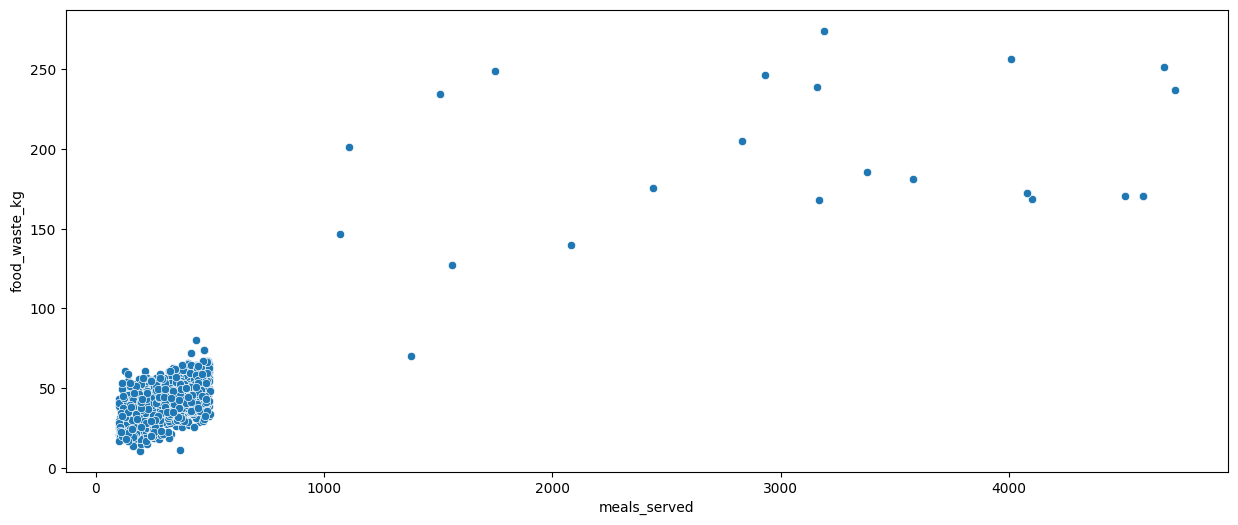

In [62]:
# relationship btwn two numerical variables
plt.figure(figsize=(15,6))

sns.scatterplot(x='meals_served', y= 'food_waste_kg', data=clean_df)

plt.show()

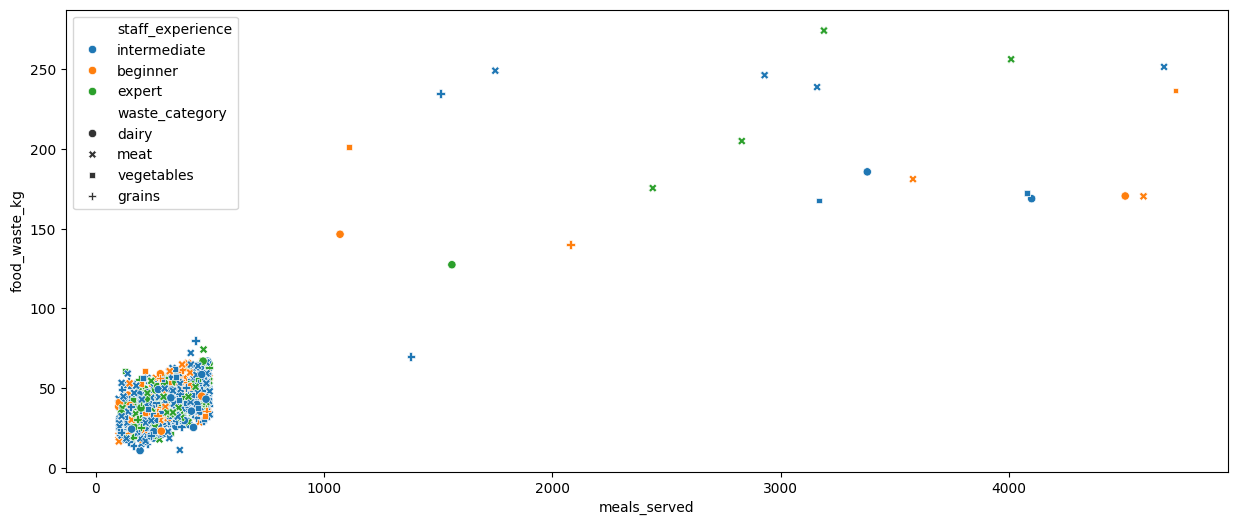

In [65]:
plt.figure(figsize=(15,6))

sns.scatterplot(x='meals_served', y= 'food_waste_kg', data=clean_df, hue='staff_experience', style='waste_category')

plt.show()

## HISTOGRAMS

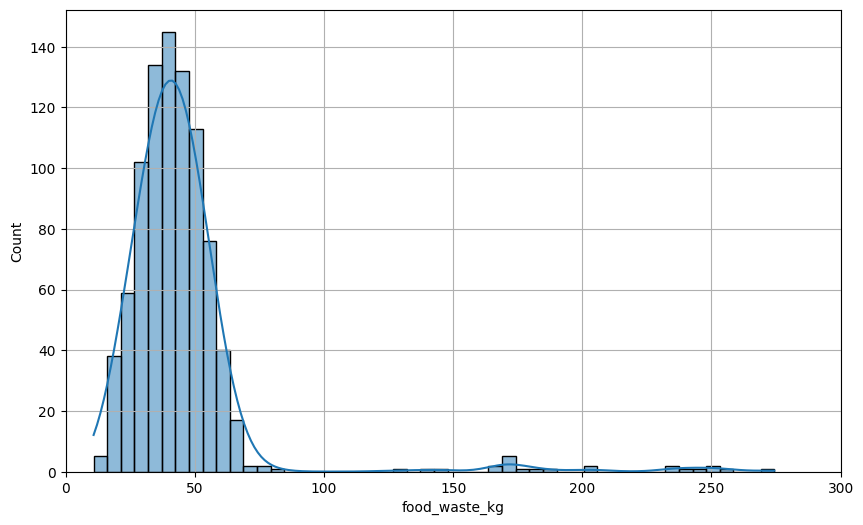

In [70]:
plt.figure(figsize=(10,6))

sns.histplot(data=clean_df, x='food_waste_kg', bins=50, kde=True)

plt.grid(True)
plt.xlim(0,300)
plt.show()

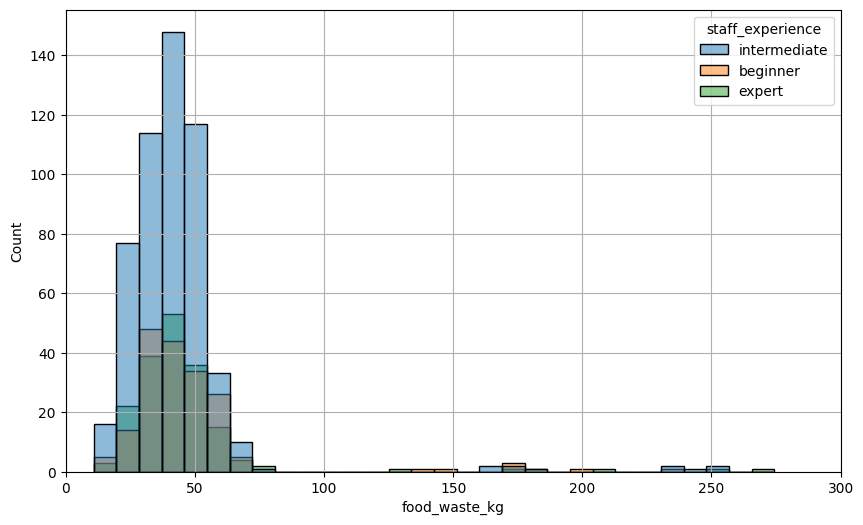

In [76]:
plt.figure(figsize=(10,6))

sns.histplot(data=clean_df, x='food_waste_kg', bins=30, hue='staff_experience')

plt.grid(True)
plt.xlim(0,300)
plt.show()

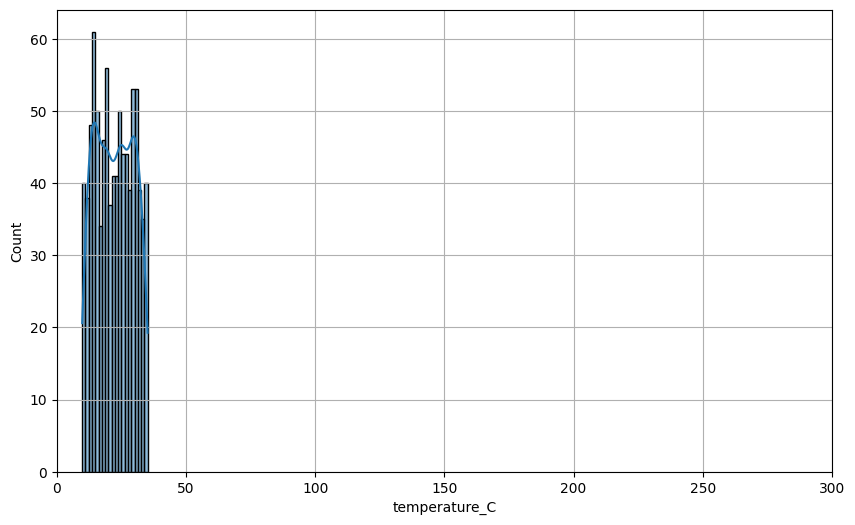

In [73]:
plt.figure(figsize=(10,6))

sns.histplot(data=clean_df, x='temperature_C', bins=20, kde=True)

plt.grid(True)
plt.xlim(0,300)
plt.show()

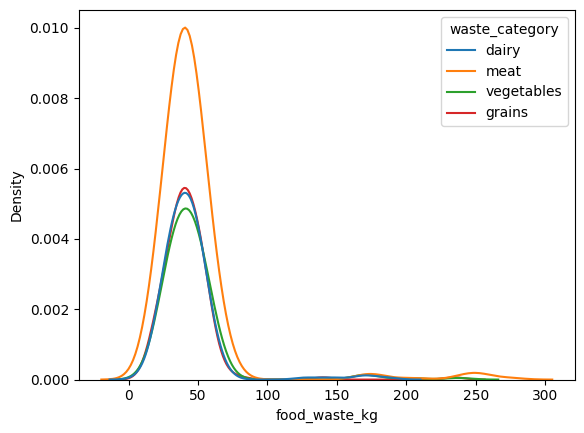

In [75]:
sns.kdeplot(data=clean_df,x='food_waste_kg',fill=False, hue='waste_category')

plt.show()

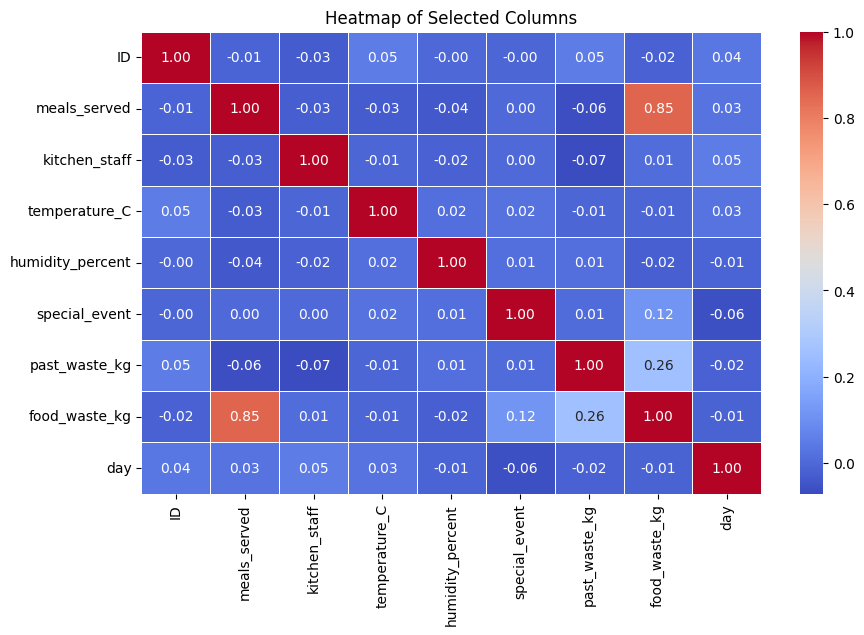

In [77]:
corr = clean_df[numeric_cols].corr()

# plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)
plt.title('Heatmap of Selected Columns')
plt.show()